### Logistic Regression using SGD with sklearn

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import math
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape


((50000, 15), (50000,))

In [4]:
std_scaler=StandardScaler()
std_scaler.fit(X)
X=std_scaler.transform(X)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)


In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [8]:
from sklearn import linear_model

In [9]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501643, T: 37500, Avg. loss: 0.552591
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752931, T: 75000, Avg. loss: 0.448047
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.903415, T: 112500, Avg. loss: 0.415746
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.42, NNZs: 15, Bias: -1.004582, T: 150000, Avg. loss: 0.400917
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.077121, T: 187500, Avg. loss: 0.392899
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131948, T: 225000, Avg. loss: 0.388113
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.172691, T: 262500, Avg. loss: 0.385093
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.204759, T: 300000, Avg. loss: 0.383088
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.230496, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [11]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.89038099,  0.63133461, -0.07625843,  0.63080196, -0.38555346,
          0.93249517, -0.89463094, -0.07388378,  0.40603287,  0.4208232 ,
          0.24669402,  0.05039546, -0.08914778,  0.54075938,  0.0668126 ]]),
 (1, 15),
 array([-1.30679399]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Steps 

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

In [12]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

def sigmoid(w,x,b):
    return 1/(1+math.exp(-(np.dot(x,w)+b)))

def sig_pred(w,X,b):
    a=[]
    for x in X:
        a.append(sigmoid(w,x,b))
#         a.append(1/(1+math.exp(-(np.dot(x,w)+b))))
    return a
    
    
from math import log10
def compute_log_loss(A,B):
    n = len(A)
    res = 0
    for l in zip(A,B):
        res += l[0] * log10(l[1]) + (1 - l[0]) * log10(1 - l[1])                   
    loss = (-1 * res) / n
    return loss

In [13]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
print("the initial train loss is :" ,compute_log_loss(y_train,sig_pred(w,X_train,b))," at W:",w,"  and b :",b)

print("the initial test loss is :" ,compute_log_loss(y_test,sig_pred(w,X_test,b))," at W:",w,"  and b :",b)

the initial train loss is : 0.3010299956640568  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0
the initial test loss is : 0.30102999566403754  at W: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]   and b : 0


In [14]:
# write your code to implement SGD as per the above instructions
# please choose the number of iternations on your own

In [15]:
def sgd(X_train,X_test,y_train,y_test,n,w,b):
    del_w=np.zeros_like(X_train[0])
    del_b=0
    wl=[]
    bl=[]
    log_loss_train=[]
    log_loss_test=[]
    for epoch in range(n):
        for m in range(1000):
            i = np.random.choice(len(X_train))
            del_w=del_w+X_train[i]*(y_train[i]-sigmoid(w,X_train[i],b))
            del_b=del_b+(y_train[i]-sigmoid(w,X_train[i],b))
        w=(1-(alpha/n))*w+alpha*del_w
        b=b+alpha*del_b
        wl.append(w)
        bl.append(b)
        log_loss_train.append(compute_log_loss(y_train,sig_pred(w,X_train,b)))
        log_loss_test.append(compute_log_loss(y_test,sig_pred(w,X_test,b)))
#         if(log_loss_train[epoch]-log_loss_train[epoch-1]<0.00000000001):
#             break
        
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.plot(log_loss_train, label='train_log_loss')
    plt.plot(log_loss_test, label='test_log_loss')
    plt.grid()
    plt.legend()
    plt.title('Log loss vs epoch')
    plt.xlabel('Iterations')
    plt.ylabel('log loss')
    plt.show()
        
    return log_loss_train,log_loss_test,wl,bl

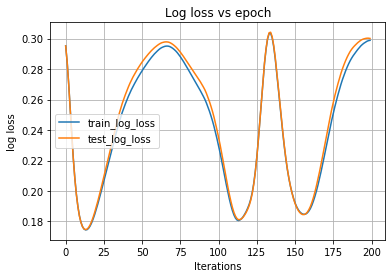

In [16]:
logloss_train,logloss_test,W,B=sgd(X_train,X_test,y_train,y_test,200,w,b)


### Report

In [17]:
from sklearn.metrics import accuracy_score

ind = np.argmin(logloss_train)
ind_t=np.argmin(logloss_test)
print("We can see that the least training error is at: ",ind," and the least test error is at: ",ind_t," iterations.")
print("\nThe logg loss for test data is : ",logloss_test[ind])
print("\nThe decision vector is :",W[ind_t])
print("\nThe bias is :",B[ind_t])
print("\nThe test accuracy is : ", accuracy_score(y_test,pred(W[ind],B[ind],X_test)))
print("\nThe train accuracy is : ", accuracy_score(y_train,pred(W[ind],B[ind],X_train)))

We can see that the least training error is at:  13  and the least test error is at:  13  iterations.

The logg loss for test data is :  0.1746602307006852

The decision vector is : [-0.84394294  0.55907705  0.20171051  0.59075388 -0.14467567  1.07669114
 -1.0217335  -0.04411901  0.4222848   0.12406564  0.20187177 -0.04439675
  0.01074723  0.53710308  0.23673966]

The bias is : -1.436439262549851

The test accuracy is :  0.826

The train accuracy is :  0.8235733333333334
